# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\accch\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv('Data/data_clean.csv')


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   post_id                        100 non-null    int64 
 1   text                           99 non-null     object
 2   post_text                      99 non-null     object
 3   original_text                  28 non-null     object
 4   time                           100 non-null    object
 5   timestamp                      100 non-null    int64 
 6   image                          97 non-null     object
 7   image_lowquality               100 non-null    object
 8   images                         100 non-null    object
 9   images_description             100 non-null    object
 10  images_lowquality              100 non-null    object
 11  images_lowquality_description  100 non-null    object
 12  likes                          100 non-null    int64 
 13  commen

# Lấy captions của các bài đăng

In [5]:
df_text = raw_df[['post_id','post_text']]
df_text

,post_id,post_text
0,681246887444577,Lần cuối cùng được nhìn thấy Nobara! 😭💔
1,681218367447429,Chúc mừng em ❤️
2,681191357450130,Màu trắng huyền thoại! 😳\n\nThe legendary whit...
3,681168744119058,Đây mới đúng là một người đàn ông đích thực..\...
4,681125257456740,Một Artist đã cosplay lại chính nhân vật mà an...
...,...,...
95,676117784624154,Cảm ơn Sukuna 👍\n\nThank you Sukuna 👍
96,676094437959822,2 chồng về Việt Nam! 😍😍
97,676061041296495,Nụ cười đã tắt 💔\n\nThe smile was turned off 💔
98,676021787967087,"Tinh hoa hội tụ, phụ nữ gấc iu 🙆🏻‍♀️💗"


# Tổng lượt tương tác của tất cả các bài

In [6]:
# Tổng tất cả tương tác của tất cả các bài
total_reactions_full = raw_df[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].sum().sum()
total_reactions_full

955713

In [7]:
# Tổng từng loại tương tác của tất cả các bài
total_reactions = raw_df[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].sum()
total_reactions

like        424866
love         30355
haha        226909
wow           5100
care          2384
sad         212163
angry         1000
shares        6805
comments     46131
dtype: int64

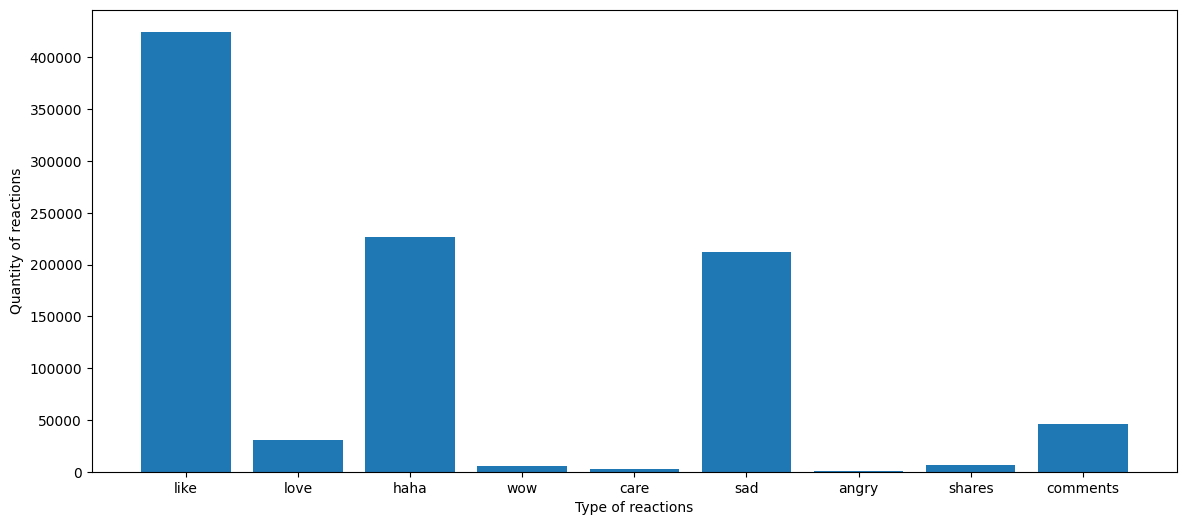

In [8]:
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Quantity of reactions')
plt.xlabel('Type of reactions')
plt.show()

# Bài viết có lượt tương tác lớn nhất và nhỏ nhất

In [9]:
# Bài viết có lượt tương tác lớn nhất

# Tính tổng lượt tương tác cho mỗi bài viết
raw_df['total_interactions'] = raw_df['comments'] + raw_df['reaction_count'] + raw_df['shares']

# Sắp xếp data theo tổng lượt tương tác giảm dần
sort_data = raw_df.sort_values(by='total_interactions', ascending=False)

# Lấy thông tin của bài viết có tổng lượt tương tác lớn nhất
most_interactions_post = sort_data.iloc[0]

# Lấy thông tin từng loại tương tác
interactions_info = most_interactions_post[['like', 'love','care', 'haha', 'wow', 'sad', 'angry', 'comments', 'shares']]

# In thông tin bài viết
print("Thông tin bài viết có lượt tương tác lớn nhất:")
print(most_interactions_post[['post_id', 'time','total_interactions']])
print("\nThông tin từng loại tương tác:")
print(interactions_info)
    

Thông tin bài viết có lượt tương tác lớn nhất:
post_id                   677514484484484
time                  2023-11-21 12:50:59
total_interactions                  62655
Name: 71, dtype: object

Thông tin từng loại tương tác:
like        25417
love          673
care          197
haha          240
wow           155
sad         31994
angry          32
comments     3300
shares        647
Name: 71, dtype: object


In [10]:
# Bài viết có lượt tương tác nhỏ nhất

# Tính tổng lượt tương tác cho mỗi bài viết
raw_df['total_interactions'] = raw_df['comments'] + raw_df['reaction_count'] + raw_df['shares']

# Sắp xếp data theo tổng lượt tương tác tăng dần
sort_data = raw_df.sort_values(by='total_interactions', ascending=True)

# Lấy thông tin của bài viết có tổng lượt tương tác nhỏ nhất
most_interactions_post = sort_data.iloc[0]

# Lấy thông tin từng loại tương tác
interactions_info = most_interactions_post[['like', 'love','care', 'haha', 'wow', 'sad', 'angry', 'comments', 'shares']]

# In thông tin bài viết
print("Thông tin bài viết có lượt tương tác nhỏ nhất:")
print(most_interactions_post[['post_id', 'time','total_interactions']])
print("\nThông tin từng loại tương tác:")
print(interactions_info)
    

Thông tin bài viết có lượt tương tác nhỏ nhất:
post_id                   678192457750020
time                  2023-11-22 20:23:59
total_interactions                    424
Name: 56, dtype: object

Thông tin từng loại tương tác:
like        210
love          3
care          1
haha        201
wow           0
sad           3
angry         0
comments      4
shares        2
Name: 56, dtype: object


# Mốc thời gian mà Fanpage thường xuyên đăng bài 

In [11]:
# Tổng số bài đăng theo giờ
total_posts_by_hour = raw_df['hour'].value_counts()

total_posts_by_hour = total_posts_by_hour.reindex(range(24), fill_value=0)
total_posts_by_hour

hour
0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      0
8      1
9      8
10     6
11     8
12     9
13     2
14     3
15     6
16     6
17    11
18     5
19     9
20    10
21     7
22     8
23     0
Name: count, dtype: int64

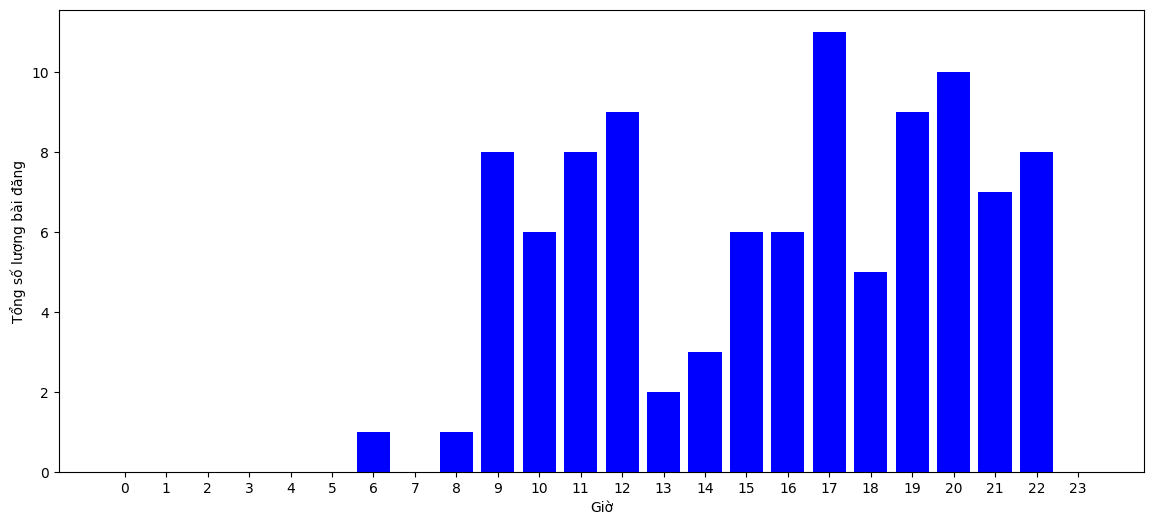

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(total_posts_by_hour.index, total_posts_by_hour.values, color='blue')
ax.set_xticks(total_posts_by_hour.index)
plt.ylabel('Tổng số lượng bài đăng')
plt.xlabel('Giờ')
plt.show()

# Mốc thời gian người dùng Facebook tương tác

In [13]:
# Tổng số reactions theo giờ
total_reactions_by_hour = raw_df.groupby('hour')['reaction_count'].sum()

total_reactions_by_hour = total_reactions_by_hour.reindex(range(24), fill_value=0)
total_reactions_by_hour

hour
0          0
1          0
2          0
3          0
4          0
5          0
6       9683
7          0
8       6891
9      67875
10     59199
11     77820
12    112454
13     24183
14     13752
15     57383
16     52924
17    108463
18     38039
19     73757
20     45447
21     64145
22     90762
23         0
Name: reaction_count, dtype: int64

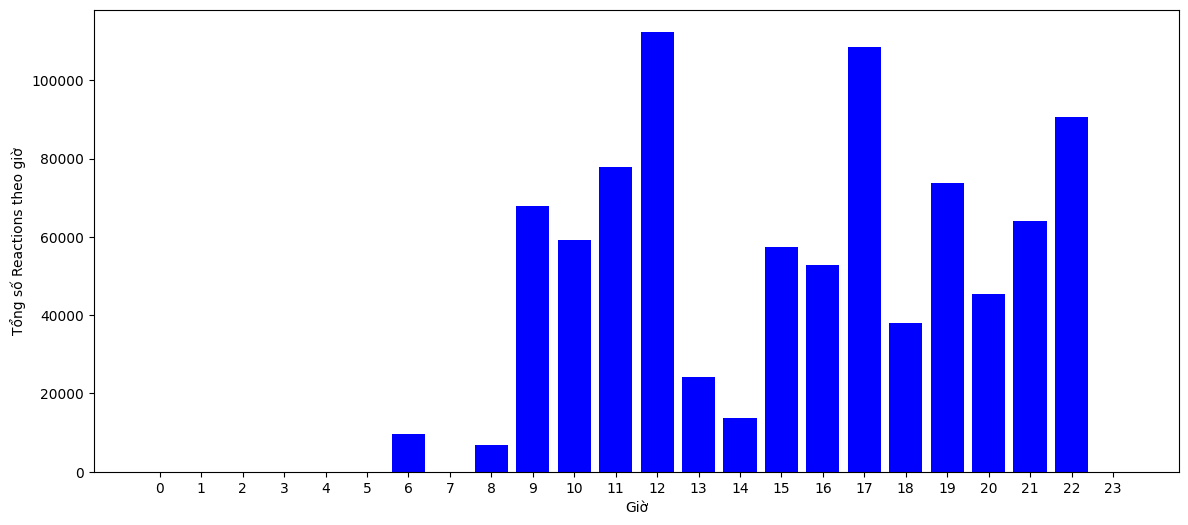

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(total_reactions_by_hour.index, total_reactions_by_hour.values, color='blue')
ax.set_xticks(total_reactions_by_hour.index)
plt.xlabel('Giờ')
plt.ylabel('Tổng số Reactions theo giờ')

plt.show()


# Sự thay đổi số lượt tương tác trong các bài đăng


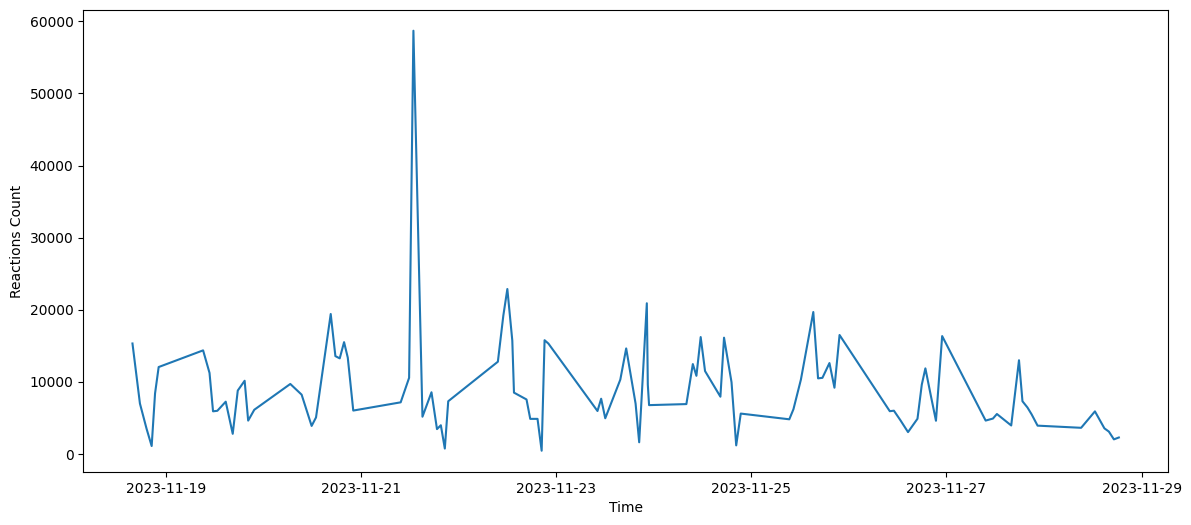

In [15]:
raw_df['time'] = pd.to_datetime(raw_df['time'])

plt.figure(figsize=(14, 6))

plt.plot(raw_df['time'], raw_df['reaction_count'])
plt.xlabel('Time')
plt.ylabel('Reactions Count')

plt.show()

# Sự tương quan giữa reactions với comments và shares

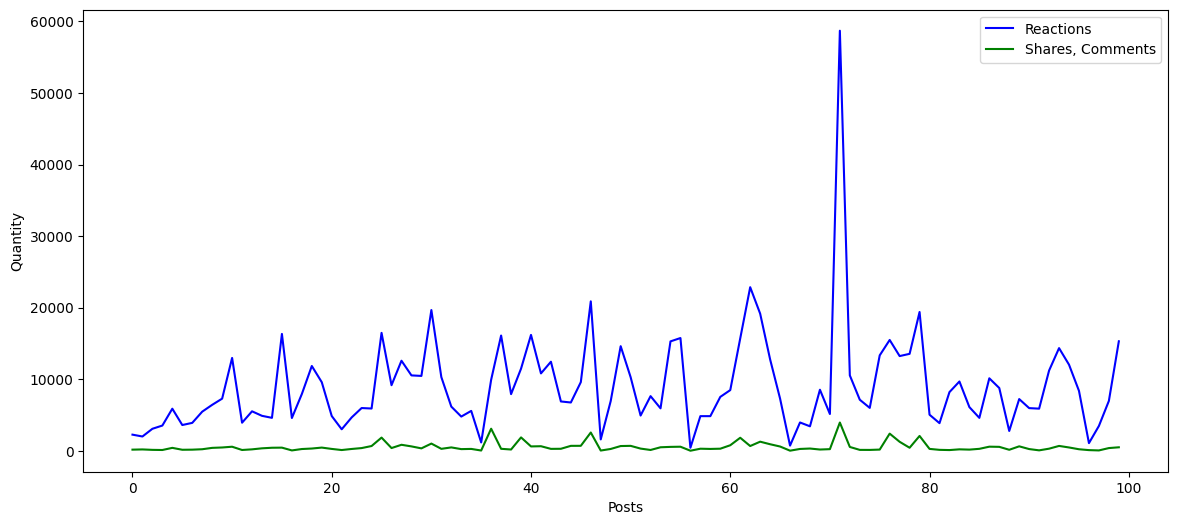

In [16]:
Y = raw_df['reaction_count']
Y2 = raw_df['comments'] + raw_df['shares']

plt.figure(figsize=(14, 6))

plt.plot(np.arange(len(Y)), Y, color='blue', label='Reactions')
plt.plot(np.arange(len(Y2)), Y2, color='green', label='Shares, Comments')

plt.xlabel('Posts')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# Từ khóa xuất hiện nhiều nhất

In [17]:
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,681246887444577,Lần cuối cùng được nhìn thấy Nobara! 😭💔
1,681218367447429,Chúc mừng em ❤️
2,681191357450130,Màu trắng huyền thoại! 😳\n\nThe legendary whit...
3,681168744119058,Đây mới đúng là một người đàn ông đích thực..\...
4,681125257456740,Một Artist đã cosplay lại chính nhân vật mà an...
...,...,...
95,676117784624154,Cảm ơn Sukuna 👍\n\nThank you Sukuna 👍
96,676094437959822,2 chồng về Việt Nam! 😍😍
97,676061041296495,Nụ cười đã tắt 💔\n\nThe smile was turned off 💔
98,676021787967087,"Tinh hoa hội tụ, phụ nữ gấc iu 🙆🏻‍♀️💗"


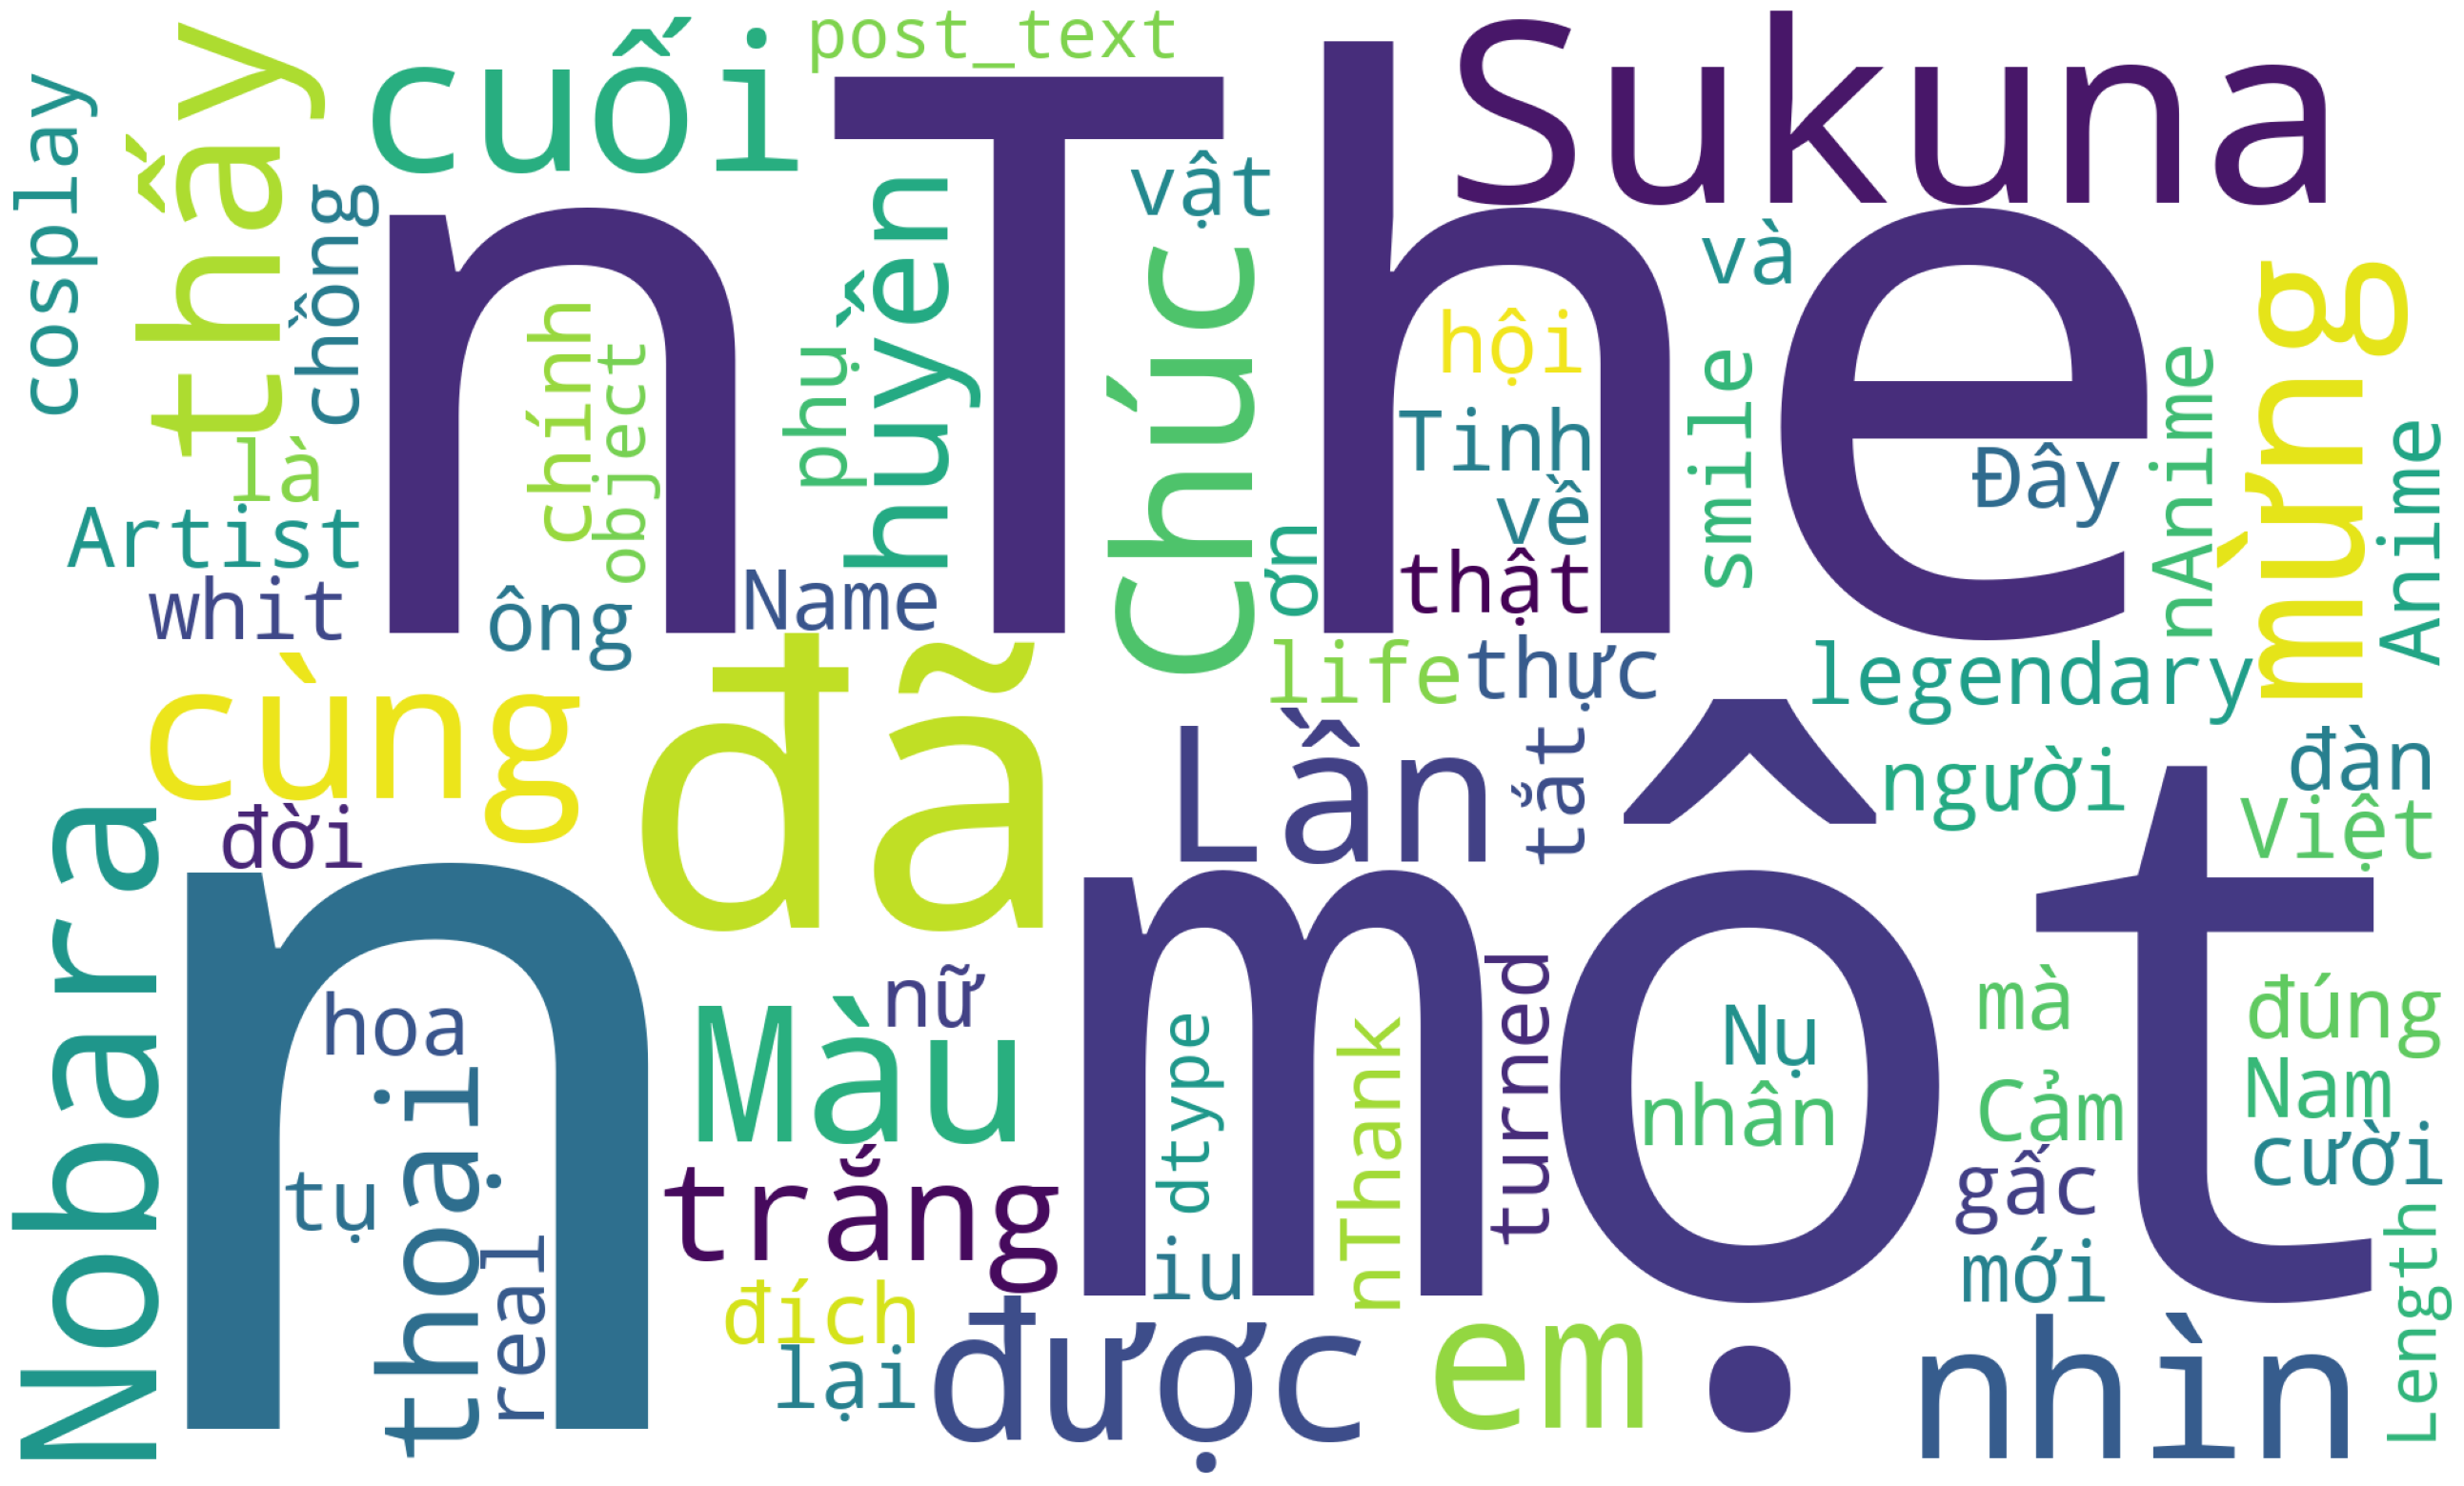

In [21]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()